# Matplotlib and Seaborn: Friends or Foes?

# Based on my experience, there are two use cases for Seaborn:

- (Q&D) Exploratory Data Analysis
- Embedding distinctive visual forms of Seaborn into a Matplotlib figure

# Setup

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [38]:
n = np.random.normal(0, 10, 1000)

In [39]:
p = np.random.poisson(10, 1000)

In [44]:
df = pd.DataFrame({'Normal distr.': n, 'Poisson distr.': p})

In [45]:
df

,Normal distr.,Poisson distr.
0,4.193503,5
1,-4.371409,8
2,9.082752,12
3,-21.493714,11
4,-12.757062,8
...,...,...
995,-4.344480,4
996,-4.247316,8
997,5.503252,14
998,-5.189708,13


# Exploratory data analysis

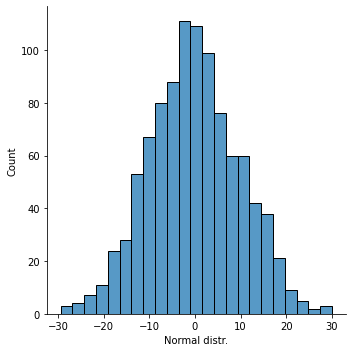

In [24]:
# continuous variable case
sns.displot(df, x='Normal distr.')

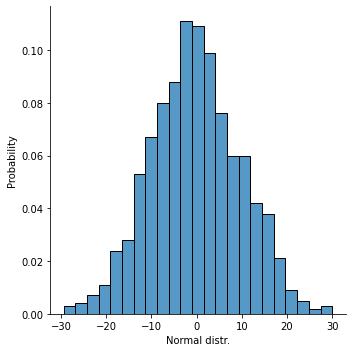

In [32]:
# replacing counts with probabilities
sns.displot(df, x='Normal distr.', stat='probability')

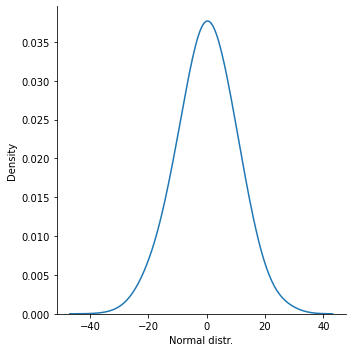

In [48]:
# let's get a kernel density
sns.displot(df, x='Normal distr.', kind='kde', bw_adjust=2)

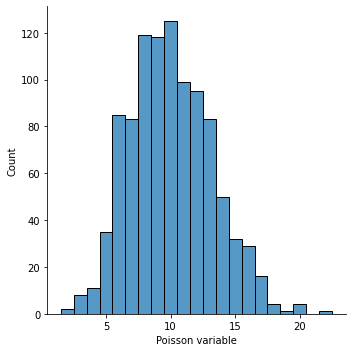

In [17]:
# discrete variable case
sns.displot(df, x='Poisson distr.', discrete=True)

In [49]:
df

,Normal distr.,Poisson distr.
0,4.193503,5
1,-4.371409,8
2,9.082752,12
3,-21.493714,11
4,-12.757062,8
...,...,...
995,-4.344480,4
996,-4.247316,8
997,5.503252,14
998,-5.189708,13


In [52]:
molten

,Distribution,Score
0,Normal distr.,2.964147
1,Normal distr.,-5.115133
2,Normal distr.,1.341705
3,Normal distr.,4.362593
4,Normal distr.,-3.627814
...,...,...
1995,Poisson distr.,6.000000
1996,Poisson distr.,9.000000
1997,Poisson distr.,8.000000
1998,Poisson distr.,12.000000


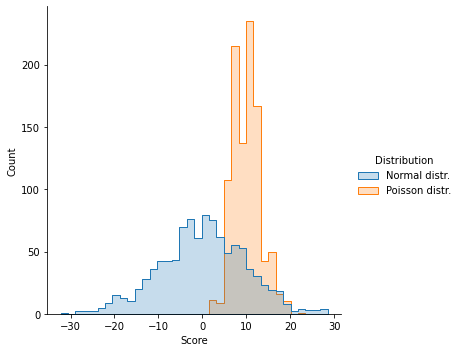

In [54]:
# conditioning on a third variable is simple
molten = pd.melt(df, value_name='Score', var_name='Distribution')
sns.displot(molten, x='Score', hue='Distribution', element='step')

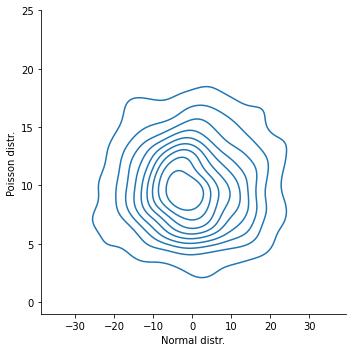

In [33]:
# producing a bivariate histogram
sns.displot(df, x='Normal distr.', y='Poisson distr.', kind='kde')

# Embedding distinctive visual forms of Seaborn into a Matplotlib figure

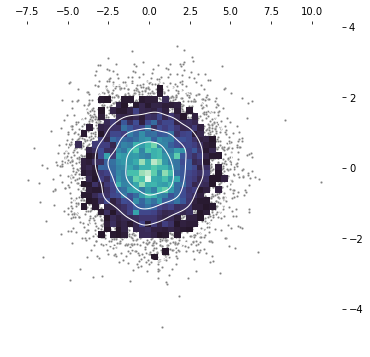

In [43]:
# daw a combo histogram and scatterplot with density contours
# create figure
fig = plt.figure(figsize=(6, 6))
# add plot
ax = fig.add_subplot(111)
# plot data
n0 = np.random.normal(0, 2, 10000)
n1 = np.random.normal(0, 1, 10000)
sns.scatterplot(x=n0, y=n1, s=5, color="gray", ax=ax)
sns.histplot(x=n0, y=n1, bins=50, pthresh=.1, cmap="mako", ax=ax)
sns.kdeplot(x=n0, y=n1, levels=5, color="w", linewidths=1, ax=ax)
# adjust axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('right')
ax.xaxis.set_ticks_position('top')
# show plot
plt.show()